# Self Organizing Map

### Importing the libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Feature Scaling


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

## Training the SOM


In [4]:
from minisom import MiniSom
# 10 by 10 map (gride)
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

## Visualizing the results


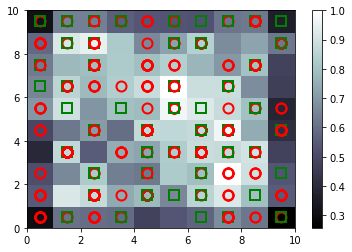

In [5]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
# som.distance_map().T : Get transpose mean interneurons distances matrix
pcolor(som.distance_map().T)
# Get legend on right
colorbar()
# create markers to identity customers who got approval
# Red circle : customers who did not get approval
# Green square : customers who got approval     
markers = ['o','s']
colors = ['r','g']
# i : for each row or customer
# x : for each column or feature
for i, x in enumerate(X):
    w = som.winner(x)
    # put marker center of square in map
    plot(
        w[0] + 0.5, 
        w[1] + 0.5,
        markers[y[i]],
        markeredgecolor=colors[y[i]],
        markerfacecolor = "None",
        markersize = 10,
        markeredgewidth = 2
        )
show()

## Finding the frauds


## Printing the Fraunch Clients

In [8]:
mappings = som.win_map(X)
# get customers in pixal = 8,8 and 1,8 (x, y)
frauds = np.concatenate((mappings[(7,2)], mappings[(5,6)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [15]:
print(frauds[:,0])

[15793317. 15636626. 15729377. 15649101. 15590434. 15671014. 15593345.]
